In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.io import loadmat

In [18]:
data_at6 = loadmat('Données/data_at6.mat') 
hydrau8=data_at6['hydrau8'] 


**La fonction fitcenter(hydrau8,C,k)**

In [19]:
def fitcenter(X,C,k):
    # pour le calcul des distances entre chaque observation et le centre i
    y = np.zeros((X.shape[0], C.shape[0]))
    for i in range(C.shape[0]):
        y[:, i] = np.linalg.norm(X - C[i, :].T, axis=1)

    # pour l'affectation au groupe i selon la distance la plus faible
    Z = np.zeros((C.shape[0], 1), dtype=int)
    for i in range(C.shape[0]):
        Z[i, 0] = np.argmin(y[i, :])
    
    #  pour la création du groupe i composé des données X affectées à i
    GrpI = []
    for i in range(C.shape[0]):
        GrpI.append(X[np.where(Z == i)[0], :])
    

    # pour le calcul du nouveau centre i (centre de gravité des groupes GrpI)
    newC = np.zeros((C.shape[0], C.shape[1]))
    for i in range(C.shape[0]):
        newC[i, :] = np.mean(GrpI[i], axis=0)

    return newC


In [20]:
random_index = np.random.randint(0, hydrau8.shape[0])
random_index 

# C=np.zeros(random_index.shape[1],hydrau8.shape[1])

# random_row = hydrau8[random_index, :]

# C[1, :] = random_row

# fitcenter(hydrau8,C,5)
# for k in range(C.shape[0]):
#     newC=fitcenter(hydrau8,C,k)
#     print(np.cross(C-newC, C-newC))


118

Nous allons utiliser la fonction KMeans de sklearn pour regrouper en différentes classes les observations. Pour ce faire nous aurons besoin d'un nombre K de groupes que l'on souhaiterait former.
Ainsi donc  nous allons tester plusieurs valeurs de K et choisir celui optimal par rapport à un critére donné (celui de l'inertie intra_classe, par exemple, que l'on cherchera à minimiser).

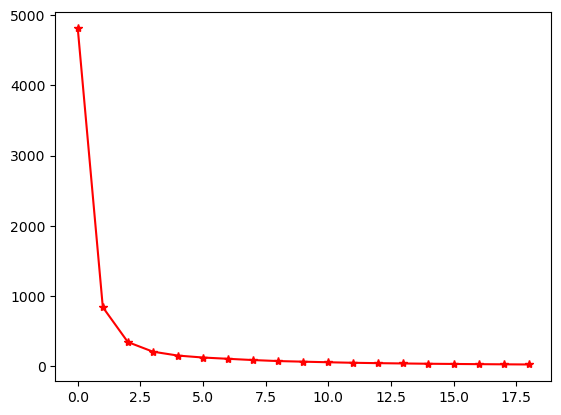

In [21]:
from sklearn.cluster import KMeans

I=[]
for k in range(1,20):
    km= KMeans(n_clusters=k, random_state=10)
    km.fit(hydrau8)
    I.append(km.inertia_)

plt.plot(I,'r*-')



On peut voir ce graphe qui représente l'évolution de l'inertie intra-classe en fonction du nombre de classe, que cette inertie est minimale pour un nombre k de classes égale à 18. On peut aussi constater qu'un nombre de classes **k=5** réalise d'une maniére approximative ce minimum de l'inertie intra-classe; donc il est raisonable de choisir **k=5** classes

In [25]:


km= KMeans(n_clusters=6, random_state=10)
km.fit(hydrau8)
pred = km.labels_


In [26]:
#Les centres des clusters
centroids=km.cluster_centers_


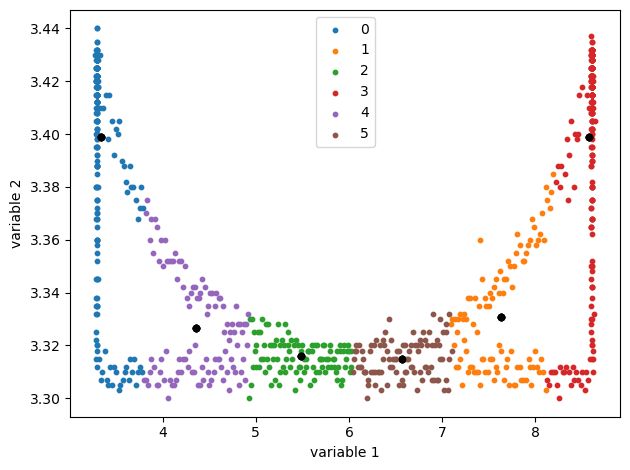

In [27]:
#Getting unique labels
 
u_labels =np.unique(pred)
 

#plotting the results:
 
for i in u_labels:
    plt.scatter(hydrau8[pred == i , 0] , hydrau8[pred == i , 1], s=10 , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.legend()

plt.tight_layout()
plt.show()